# 0.0 Imports

In [16]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.display import display, HTML

## 0.1 Helper Functions

In [17]:

display(HTML("<style>.container { width:80% !important; }</style>"))

## 0.2 Loading Data

In [18]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# merge

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

df_raw.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
102215,751,5,2015-05-01,0,0,0,1,a,0,a,a,650.0,10.0,2006.0,0,NaN,NaN,NaN
565723,89,7,2014-02-09,0,0,0,0,0,0,a,a,2380.0,7.0,2004.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
633054,520,3,2013-12-11,3308,372,1,0,0,0,a,c,6900.0,NaN,NaN,1,40.0,2012.0,"Mar,Jun,Sept,Dec"
229062,488,3,2015-01-07,4114,394,1,1,0,0,a,c,2890.0,4.0,2014.0,0,NaN,NaN,NaN
433862,913,7,2014-06-08,0,0,0,0,0,0,a,a,280.0,NaN,NaN,0,NaN,NaN,NaN


# 1.0 Descrição dos Dados

In [19]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [20]:
cols = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 
        'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2', 
        'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']


snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols))

df1.columns = cols_new

## 1.2 Data Dimension

In [21]:
df1.shape

(1017209, 18)

## 1.3 Data Types

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int64         
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  int64         
 6   promo                         1017209 non-null  int64         
 7   state_holiday                 1017209 non-null  object        
 8   school_holiday                1017209 non-null  int64         
 9   store_type                    1017209 non-null  object        
 10  assortment                    1017209 non-null  object        
 11

In [23]:
#alterando a colunda data de object para tipo data

df1['date'] = pd.to_datetime(df1['date'])

## 1.4 Check NA

In [25]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [26]:
#competition_distance  

df1['competition_distance'] = (df1['competition_distance'].
                               apply(lambda x: 200000.0 if math.isnan(x) else (x)))


#competition_open_since_month
df1['competition_open_since_month'] = (df1.apply(lambda x: x['date'].
                                                 month if math.isnan(x['competition_open_since_month'])
                                                 else x['competition_open_since_month'], axis=1))

#competition_open_since_year
df1['competition_open_since_year'] = (df1.apply(lambda x: x['date'].
                                                 year if math.isnan(x['competition_open_since_year'])
                                                 else x['competition_open_since_year'], axis=1))

#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week'])
                                               else x['promo2_since_week'], axis=1)


#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year'])
                                               else x['promo2_since_year'], axis=1)

#promo_interval

month_map = { 1: 'Jan', 2: 'Feb',  3: 'Mar',  4: 'Apr',  5: 'May', 6: 'Jun',  
             7: 'Jul',  8: 'Aug',  9: 'Sept',  10: 'Oct',  11: 'Nov',  12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = (df1[['promo_interval', 'month_map']].
                   apply(lambda x: 0 if x['promo_interval'] == 0 
                         else 1 if x['month_map'] in x['promo_interval'].split(',') 
                         else 0, axis=1))


In [27]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [28]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.6 Change Types

In [29]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7 Descriptive Statistical

In [30]:
num_attributes = df1.select_dtypes(include = ['int32', 'int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int32', 'int64', 'datetime64[ns]', 'float64'])

###  1.7.1 Numerical Attributes

In [31]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T



# Dispersion - std, min, max, ran, skew, curtusis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()

m.columns = ( [ 'features', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ] )
m

,features,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.1 Categorical Attributes

In [32]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

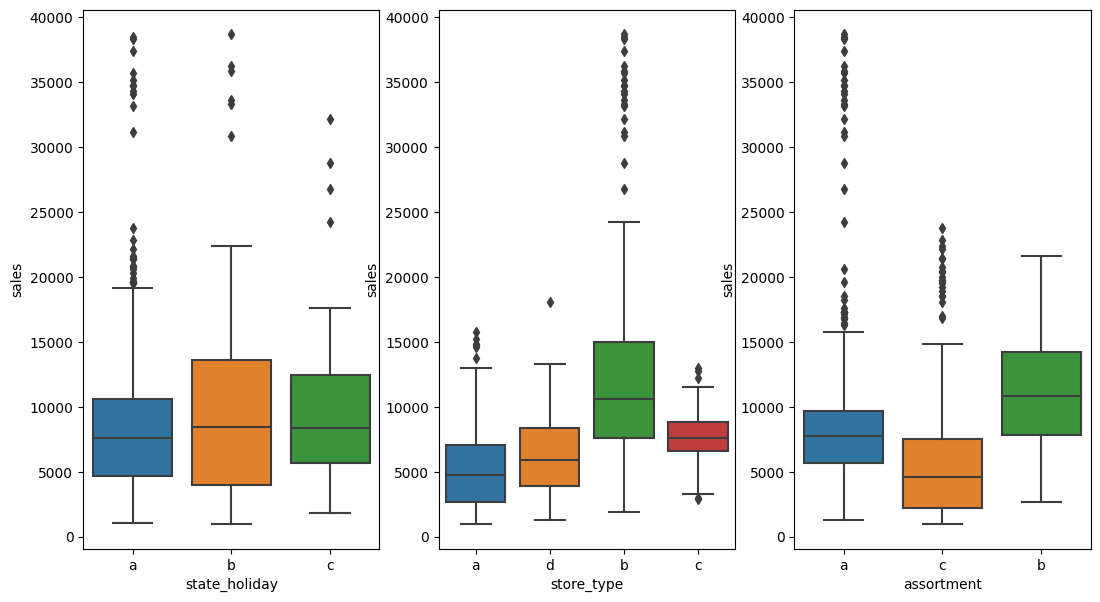

In [33]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.figure(figsize = (13, 7))
plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# 2.0 Featuring Engineering

In [34]:
df2 = df1.copy()

## 2.1 Mapa Mental das Hipóteses


## 2.1.1 Criação das Hipóteses

## 2.2 Lista Final das Hipóteses

### H1. Lojas com maior sortimentos deveriam vender mais
### H2. Lojas com competidores mais próximos deveriam vender menos.
### H3. Lojas com competidores à mais tempo deveriam vendem mais.
### H4. Lojas com promoções ativas por mais tempo deveriam vender mais.
### H5. Lojas com mais dias de promoção deveriam vender mais.
### H6. Lojas com mais promoções consecutivas deveriam vender mais.
### H7. Lojas abertas durante o feriado de Natal deveriam vender mais.
### H8. Lojas deveriam vender mais ao longo dos anos.
### H9. Lojas deveriam vender mais no segundo semestre do ano.
### H10. Lojas deveriam vender mais depois do dia 10 de cada mês.
### H11. Lojas deveriam vender menos aos finais de semana
### H12. Lojas deveriam vender menos durante os feriados escolares


## 2.3 Feature Engineering

In [35]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = (df2.apply(lambda x: datetime.datetime
                                      (year=x['competition_open_since_year'],
                                       month=x['competition_open_since_month'],
                                       day=1), axis=1))


#df2['competition_time_month'] = (((df2['date'] - df2['competition_since']) / 30).apply(lambda x: x.days).astype(int))

df2['competition_time_month'] = (df2['date'] - df2['competition_since']).apply(lambda x: (x.days)/30).astype(int)




# promo since

df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = (df2['promo_since'].
                      apply(lambda x: datetime.datetime.
                            strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7)))


df2['promo_time_week'] = df2['competition_time_month'] = (((df2['date'] - df2['promo_since']) / 7).
                                 apply(lambda x: x.days).astype(int))



# assortment



df2['assortment'] = (df2['assortment'].
                     apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended'))

# state_holiday

df2['state_holiday'] = (df2['state_holiday'].
                     apply(lambda x: 'public_holiday' if x == 'a' 
                           else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' 
                           else 'regular'))


df2.head().T


,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular,regular,regular,regular,regular
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 Filtragem de Variáveis

In [37]:
df3 = df2.copy()

## 3.1 Filtragem das Linhas

In [38]:
df3 = df3[(df3['open'] != 0 ) & (df3['sales'] > 0 )]

## 3.2 Seleção das Colunas

In [39]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis=1)

# 4.0 Análise Exploratória de Dados

In [40]:
df4 = df3.copy()

## 4.1 Análise Univariada

### 4.1.1 Response Variable

In [ ]:
sns.histplot( df4['sales'])
sns.set(rc={'figure.figsize':(11.7,8.27)})

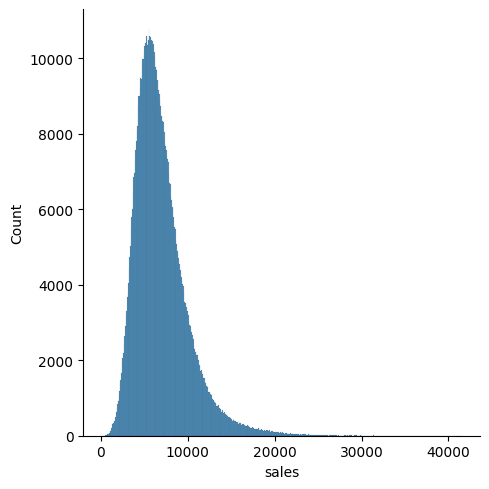

In [42]:
sns.displot(df4['sales']);

### 4.1.2 Numerical Variable

In [ ]:
num_attributes.hist(bins=25, figsize=(22,11))
plt.tight_layout();

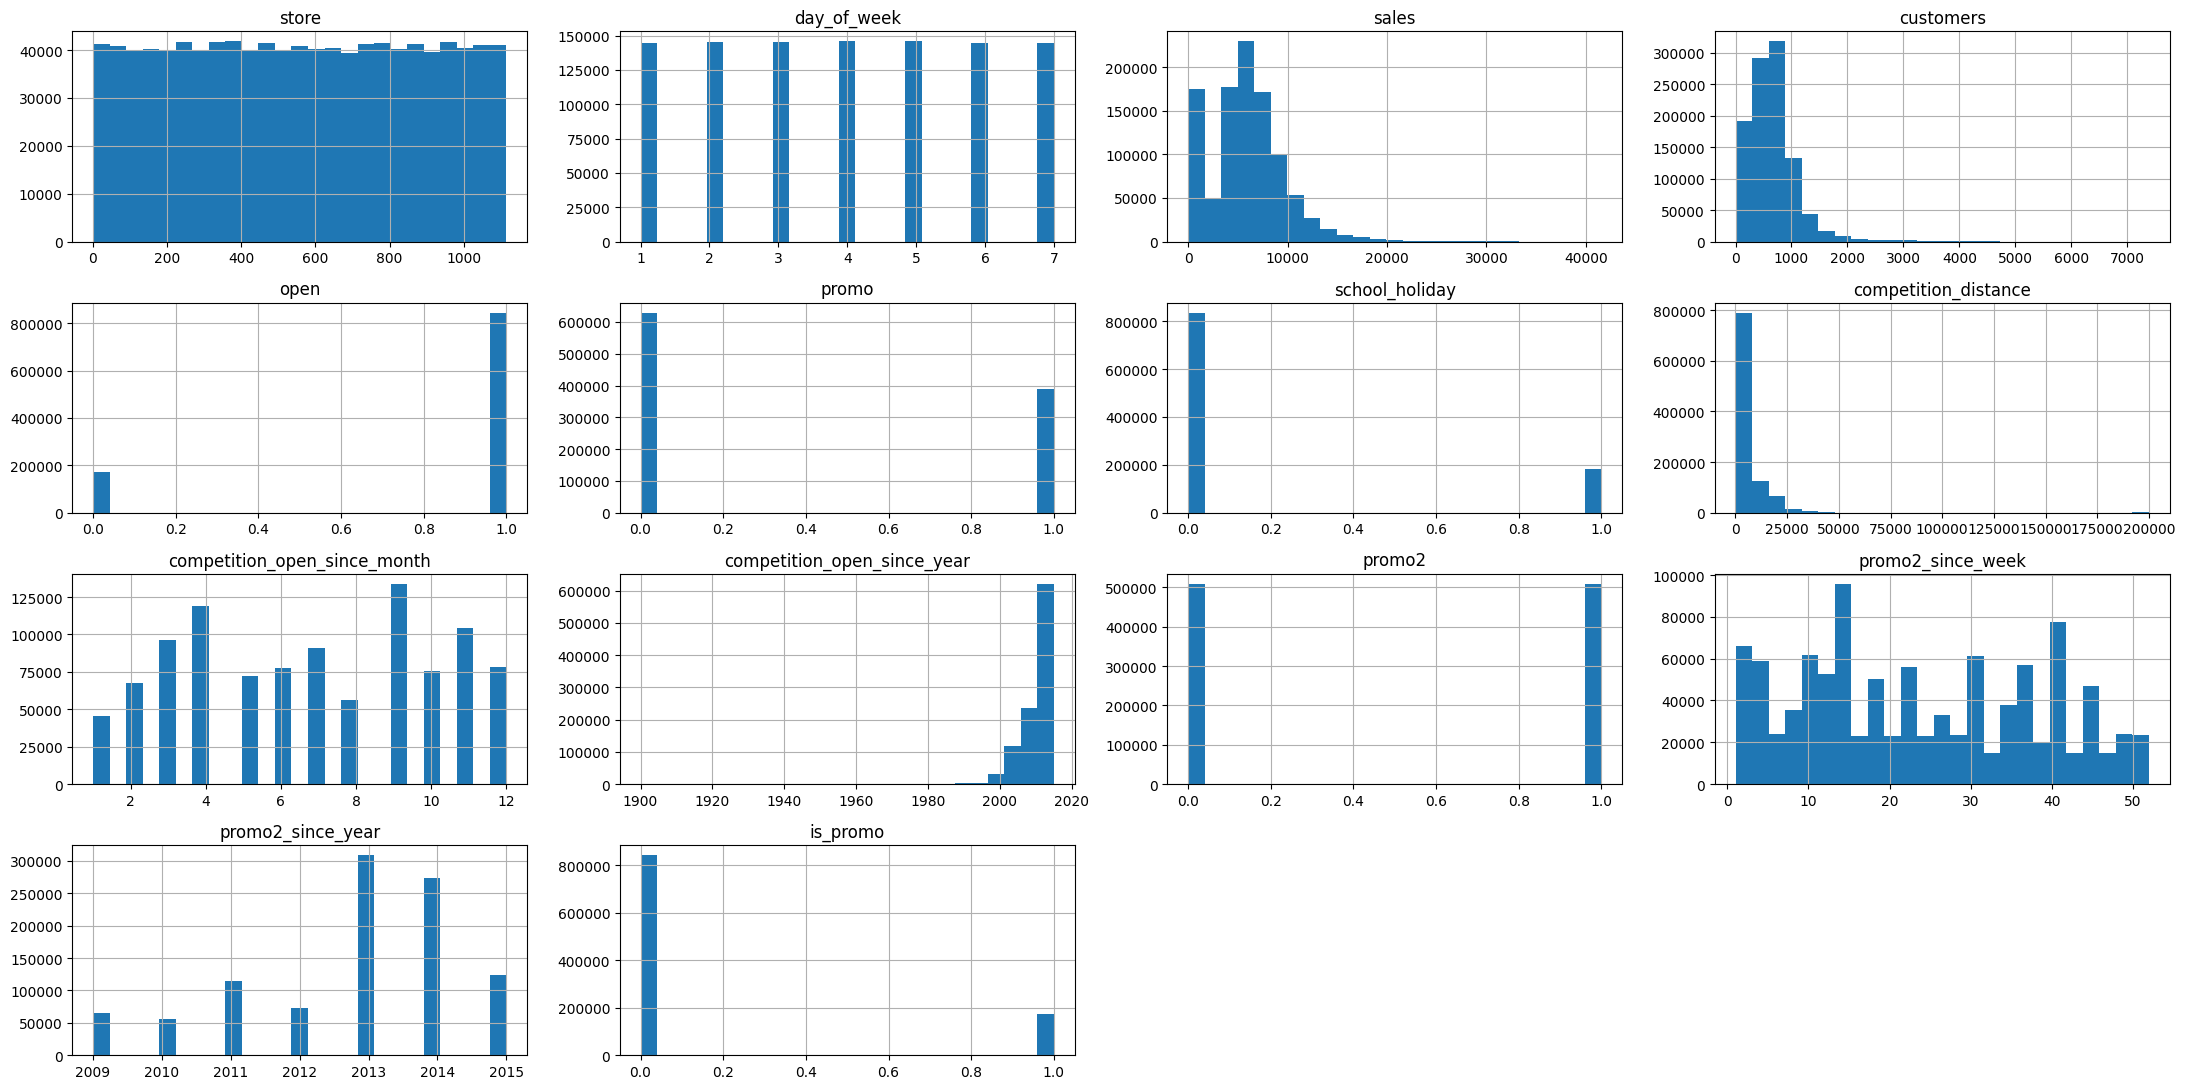

In [44]:
num_attributes.hist(bins=25, figsize=(22,11))
plt.tight_layout();

### 4.1.3 Categorical Variable¶

In [45]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

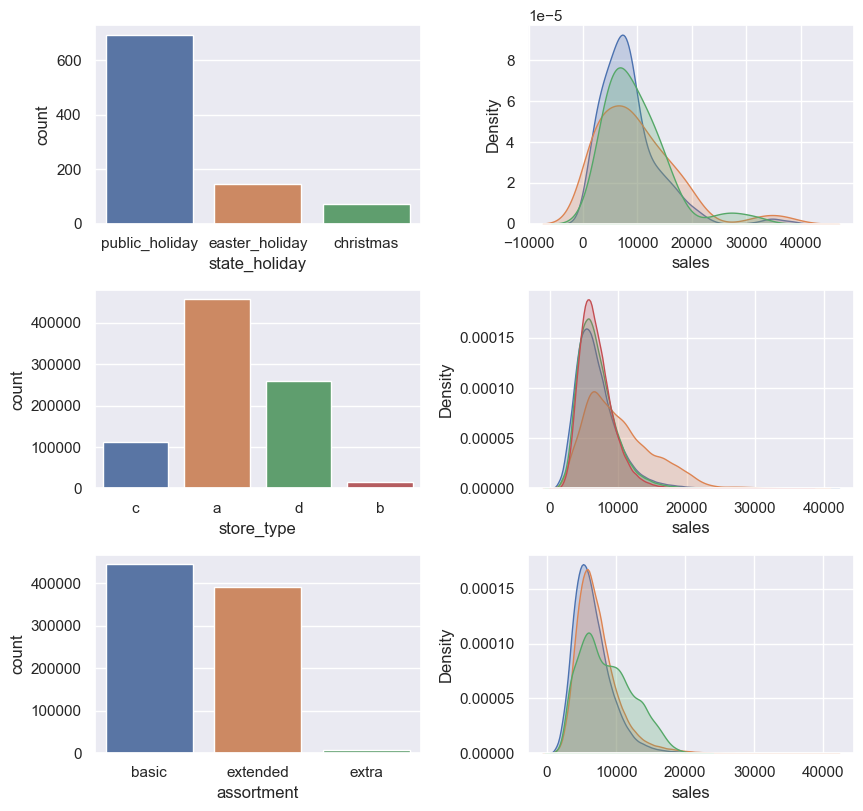

In [48]:
#state_holiday

plt.subplot(3, 2, 1)
aux4 = df4[df4['state_holiday'] != 'regular']
sns.countplot( data = aux4, x='state_holiday' )
sns.set(rc={'figure.figsize':(8.8,8.27)})
plt.tight_layout();

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', fill=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.tight_layout();



#store_type

plt.subplot(3, 2, 3)
sns.countplot( data = df4, x='store_type' )
sns.set(rc={'figure.figsize':(8.8,8.27)})
plt.tight_layout();

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', fill=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.tight_layout();

#assortment

plt.subplot(3, 2, 5)
sns.countplot( data = df4, x='assortment' )
sns.set(rc={'figure.figsize':(8.8,8.27)})
plt.tight_layout();

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.tight_layout();

## 4.2 Análise Bivariada

### H1. Lojas com maior sortimentos deveriam vender mais

- **FALSA** Lojas com maior sortimento vendem menos

<Axes: xlabel='year_week'>

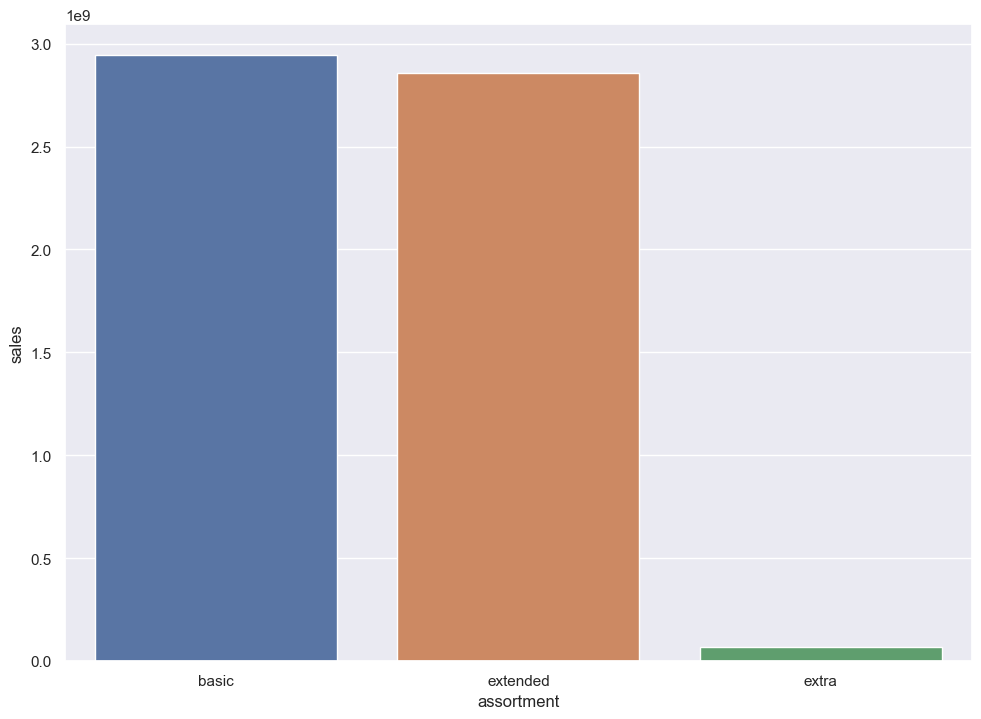

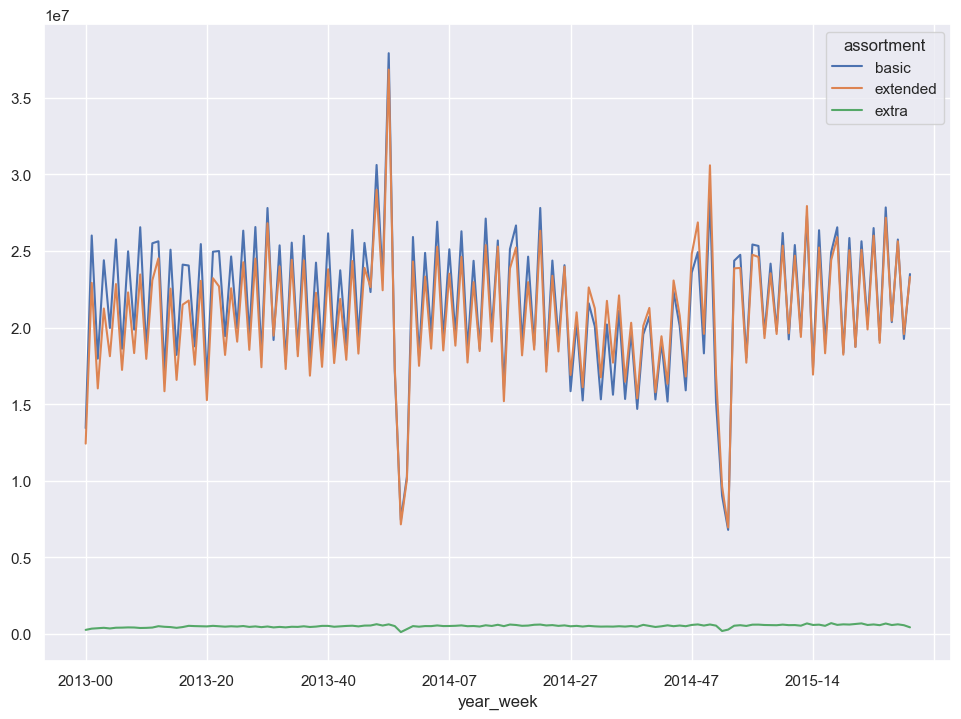

In [49]:
df_h1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x= 'assortment', y= 'sales', data = df_h1);

df_h1_2 = df4[['year_week' ,'assortment', 'sales']].groupby(['assortment', 'year_week']).sum().reset_index()
df_h1_2.pivot(index= 'year_week', columns= 'assortment' , values= 'sales' ).plot()




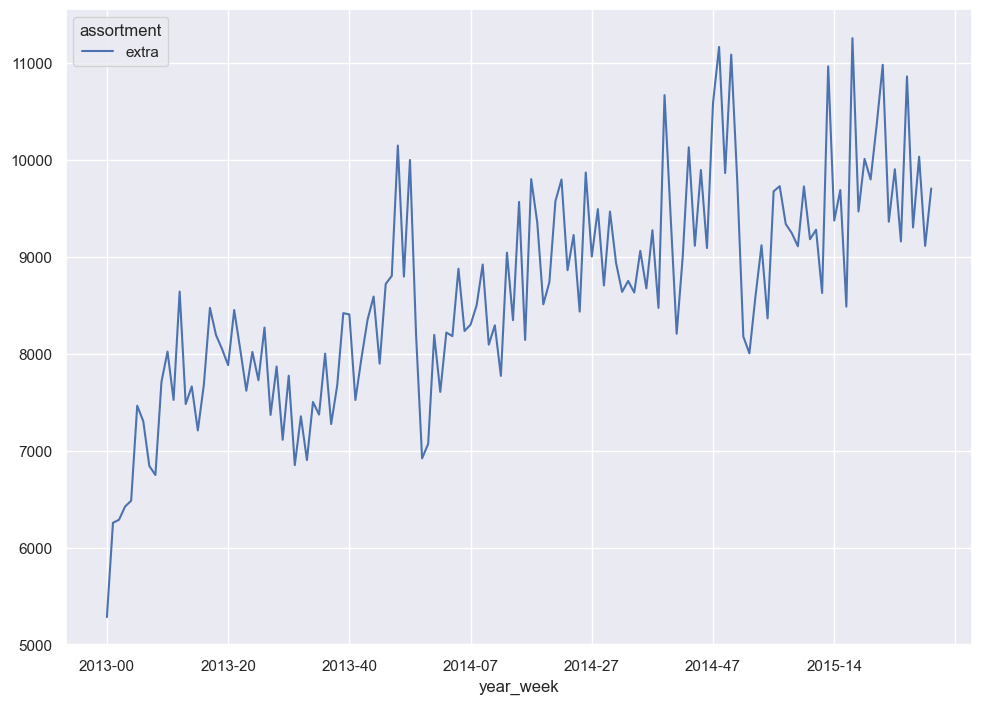

In [50]:
df_h1_3 = df4[df4['assortment'] == 'extra'].reset_index()
df_h1_3.pivot_table(index= 'year_week', columns= 'assortment' , values= 'sales' ).plot();

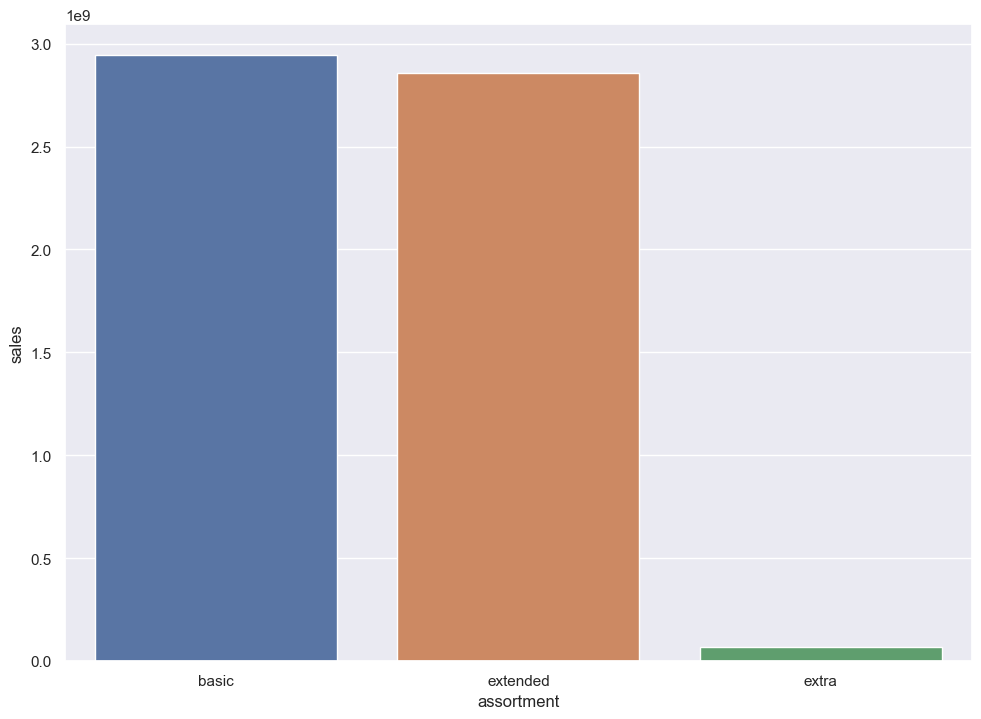

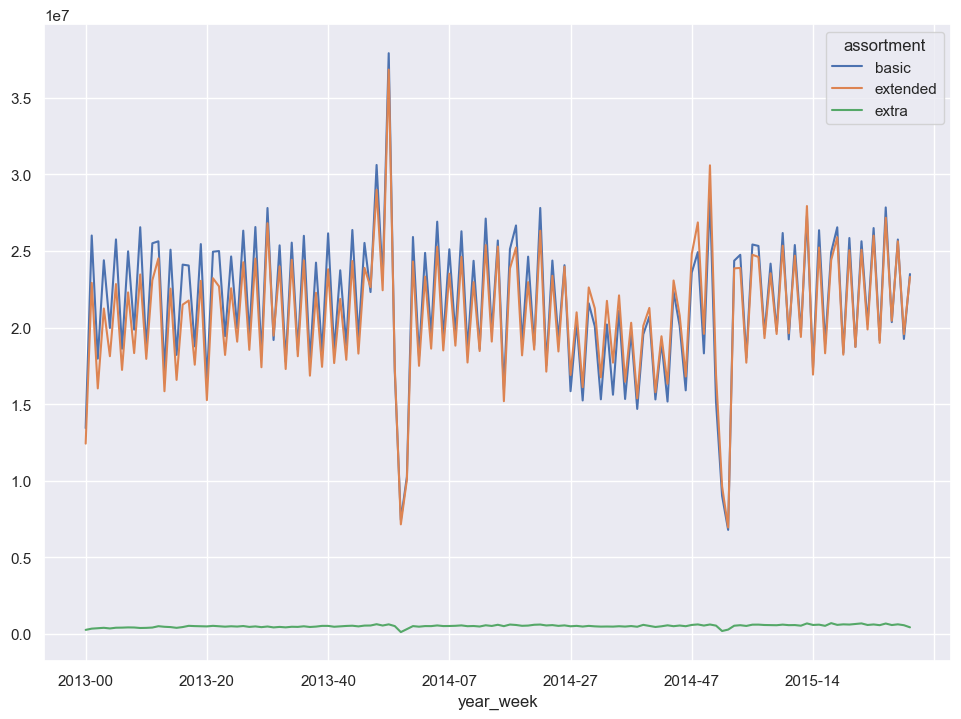

In [51]:
h1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(data = h1, x= 'assortment', y='sales');

 
h1_2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
h1_2.pivot(index='year_week', columns='assortment', values='sales').plot();

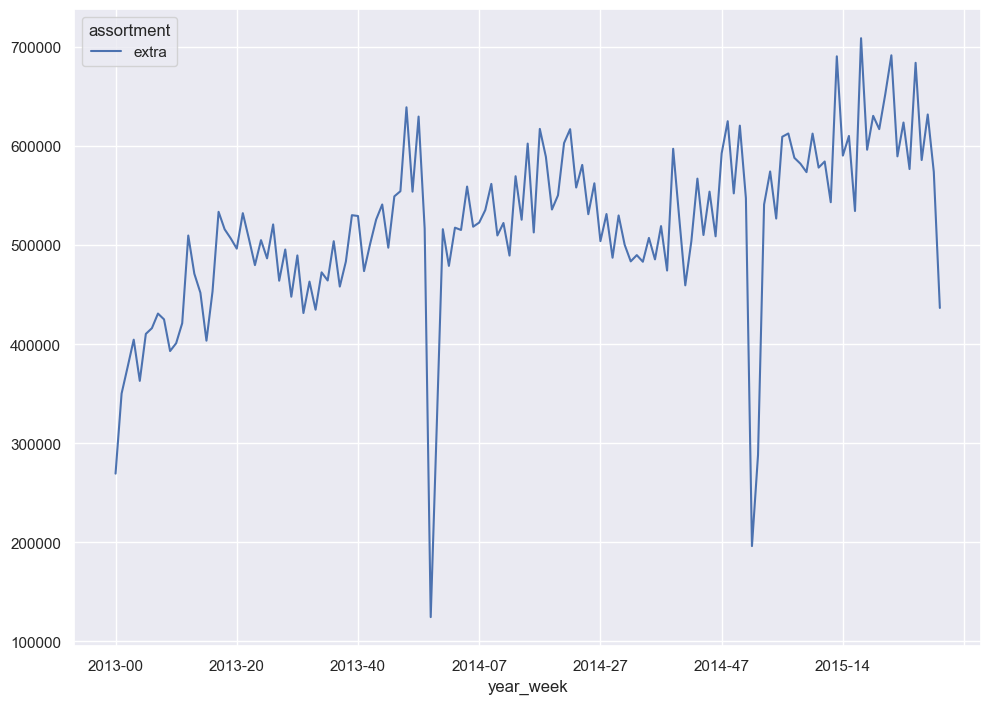

In [53]:
h1_3 = df4[df4['assortment'] == 'extra']
h1_3 = h1_3[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
h1_3.pivot(index='year_week', columns='assortment', values='sales').plot();

### H2. Lojas com competidores mais próximos deveriam vender menos.

- **FALSA**: Lojas com competidores próximos vendem mais

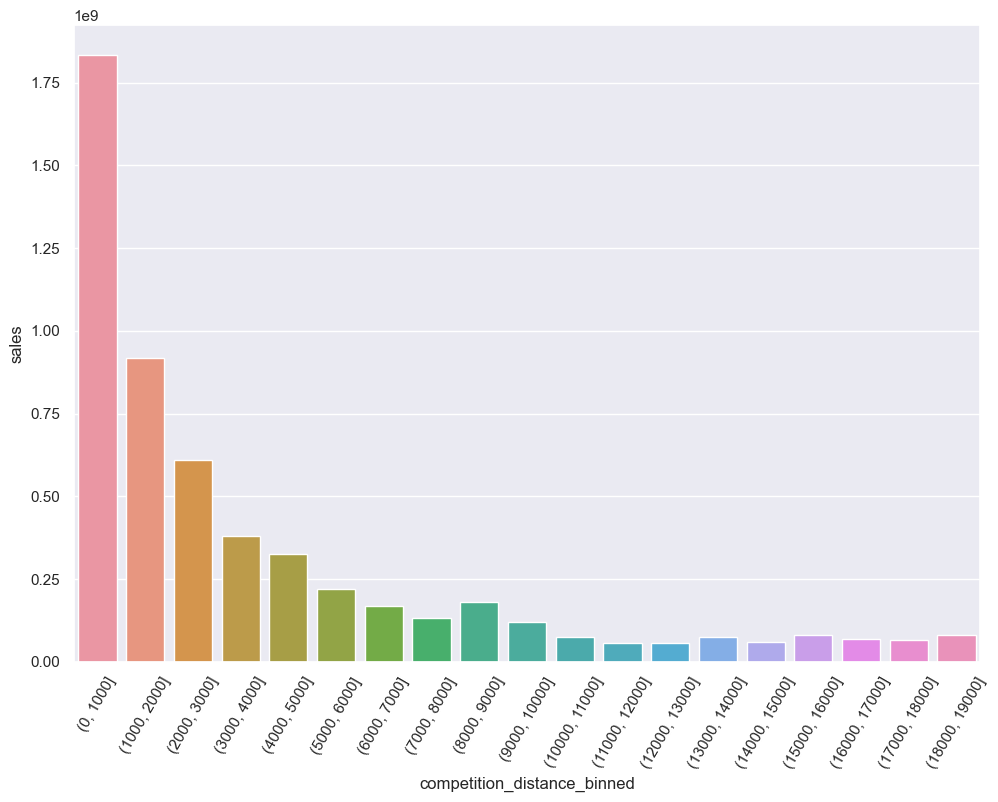

In [54]:
h2 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()


bins = list(np.arange(0, 20000, 1000))
h2['competition_distance_binned'] = pd.cut(h2['competition_distance'], bins=bins) 
h2_2 = h2[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x= 'competition_distance_binned', y='sales', data=h2_2)
plt.xticks(rotation=60);

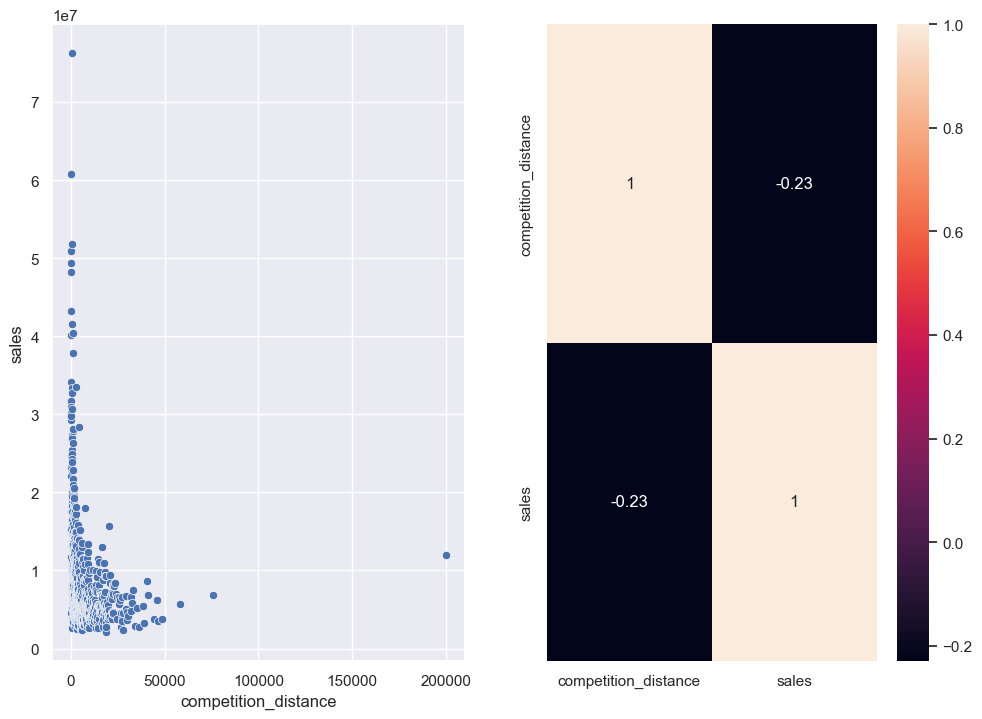

In [59]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='competition_distance', y='sales', data=h2)

plt.subplot(1, 2, 2)
corr = h2[['competition_distance', 'sales']]
corr = corr.corr()
sns.heatmap(corr, annot=True);

### H3. Lojas com competidores à mais tempo deveriam vendem mais.

- ***FALSA:*** Lojas com competidores a mais tempo vendem menos, a venda é maior quanto mais recente é a competição


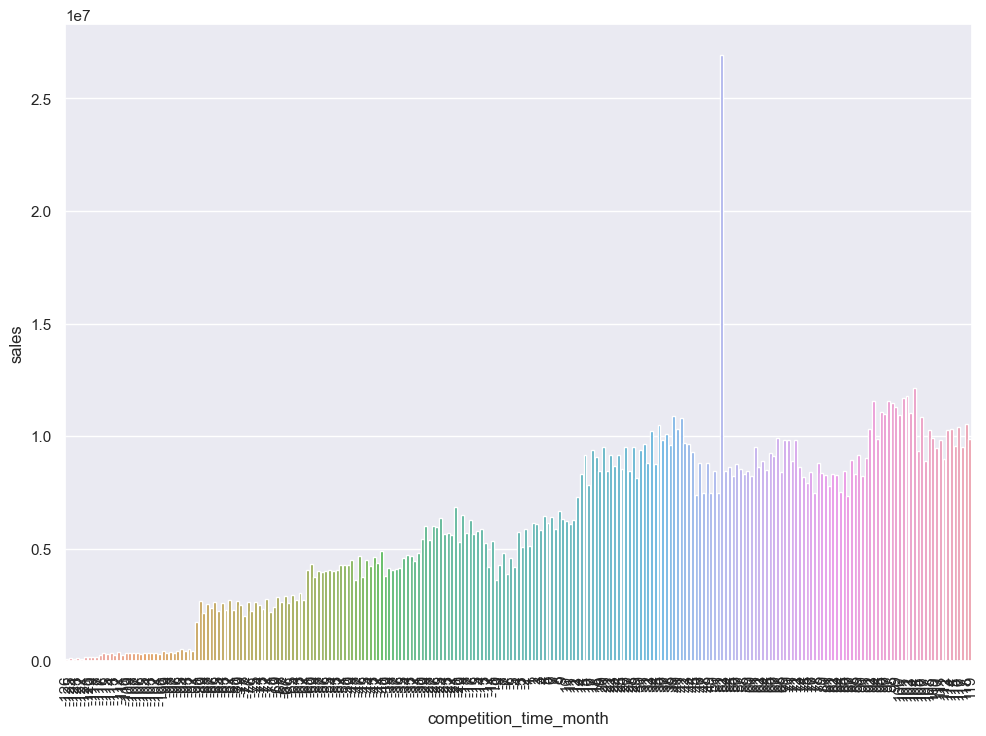

In [60]:
h3 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
h3_1 = h3[(h3['competition_time_month'] < 120) & (h3['competition_time_month'] != 0)]
sns.barplot(data=h3_1, x='competition_time_month', y='sales')
plt.xticks(rotation=90);

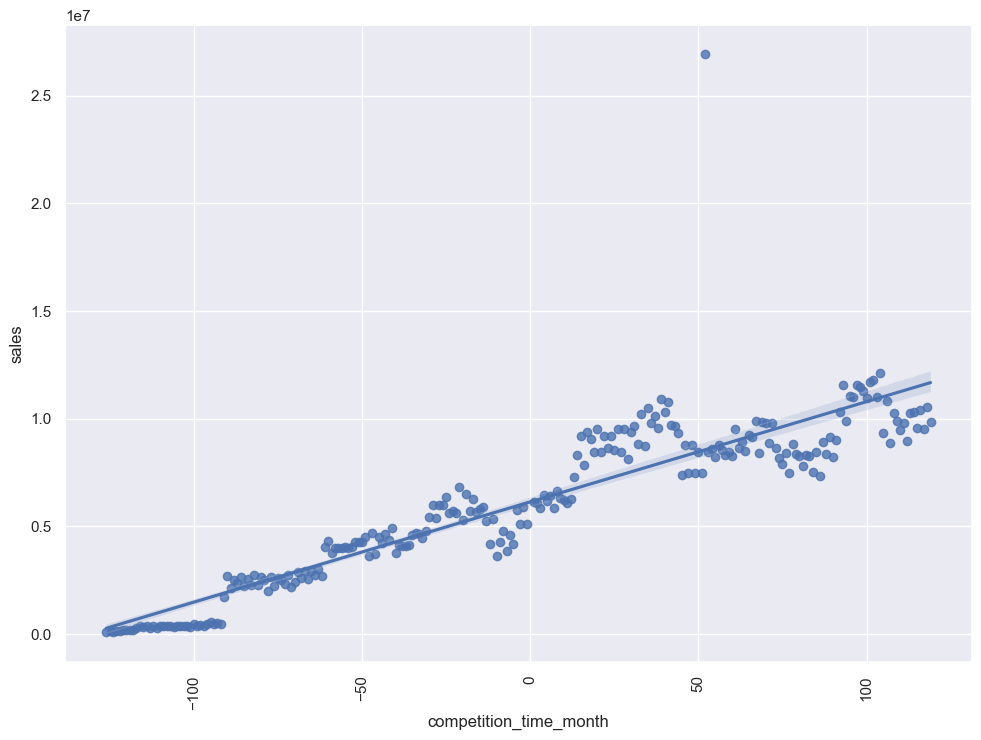

In [61]:
sns.regplot(data=h3_1, x='competition_time_month', y='sales')
plt.xticks(rotation=90);

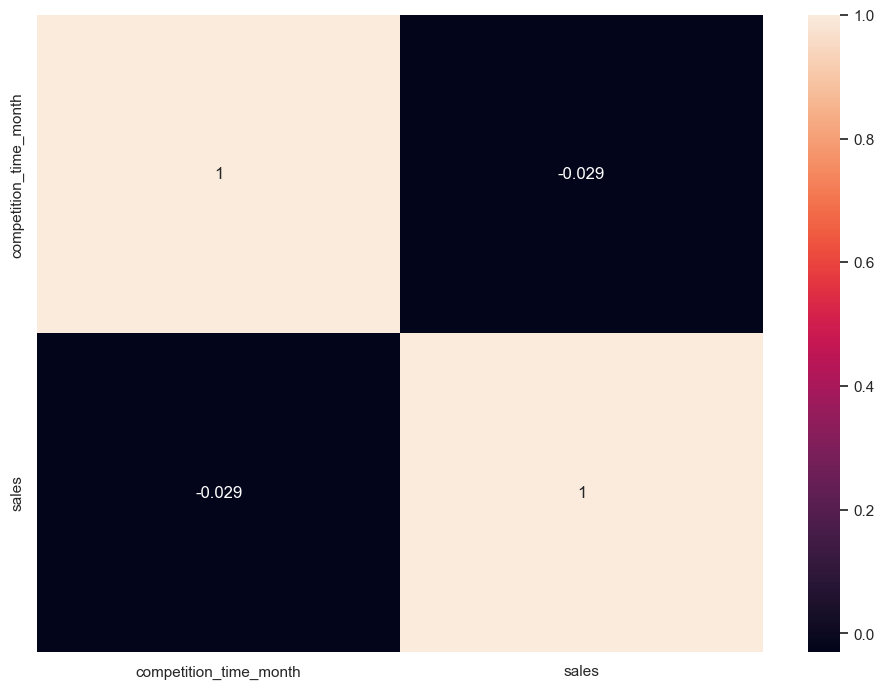

In [62]:
sns.heatmap(h3[['competition_time_month', 'sales']].corr(method='pearson'), annot=True);

### H4. Lojas com promoções ativas por mais tempo deveriam vender mais.

- ***FALSA:*** Lojas com promoções ativas a mais tempo, vendem menos, após certo período de promoção.


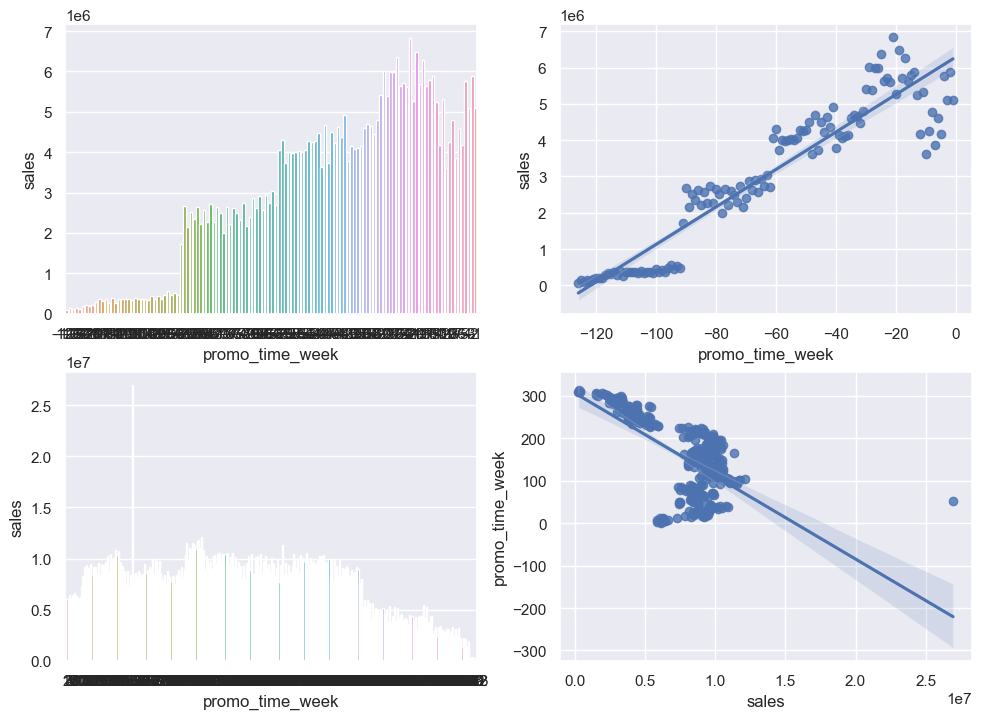

In [64]:
h4 = df4[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

plt.subplot(2, 2, 1)
h4_2 = h4[h4['promo_time_week'] < 0]
sns.barplot(data = h4_2, x='promo_time_week', y='sales')

plt.subplot(2, 2, 2)
sns.regplot(data = h4_2, x='promo_time_week', y='sales')

plt.subplot(2, 2, 3)
h4_3 = h4[h4['promo_time_week'] > 0]
sns.barplot(data = h4_3, x='promo_time_week', y='sales')


plt.subplot(2, 2, 4)
sns.regplot(data = h4_3, y= 'promo_time_week', x='sales');

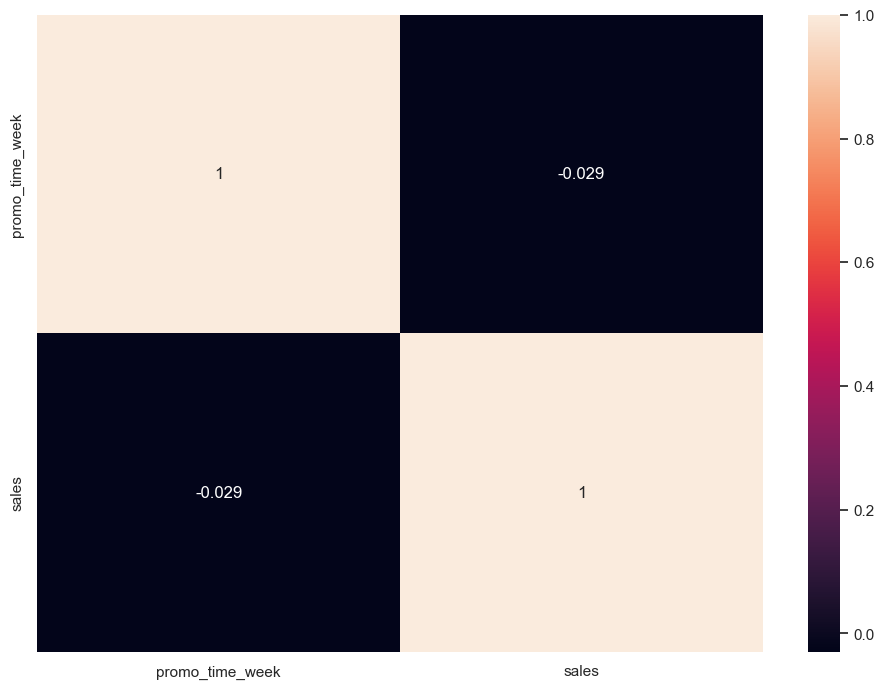

In [65]:
sns.heatmap(h4[['promo_time_week', 'sales']].corr(method='pearson'), annot=True);

### <s>H5. Lojas com mais dias de promoção deveriam vender mais.</s>

### H6. Lojas com mais promoções consecutivas deveriam vender mais.

- ***FALSA**: Lojas com mais promoções consecutivas vendem menos

In [66]:
df4[['promo', 'promo2', 'sales']].groupby(['promo', 'promo2']).sum().reset_index()


,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


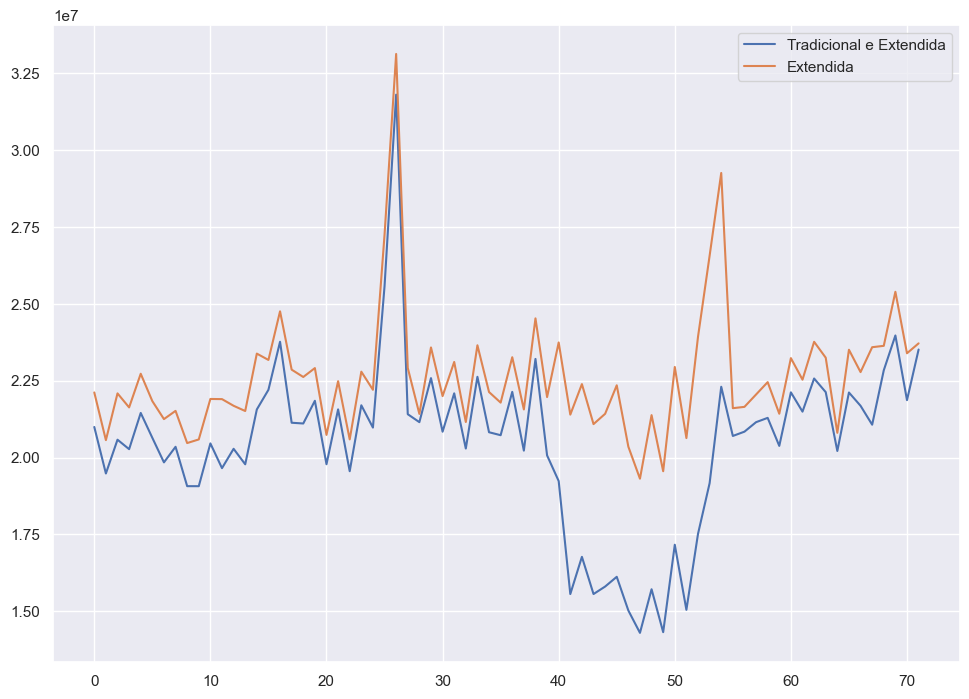

In [67]:
h4 = df4[(df4['promo'] == 1) & (df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
h4 = h4.plot()

h4_2 = df4[(df4['promo'] == 1) & (df4['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
h4_2.plot(ax=h4)

h4.legend(labels=['Tradicional e Extendida', 'Extendida']);

### H7. Lojas abertas durante o feriado de Natal deveriam vender mais que os outros feriados juntos

- ***FALSA:*** Lojas abertas no nata vendem menos.


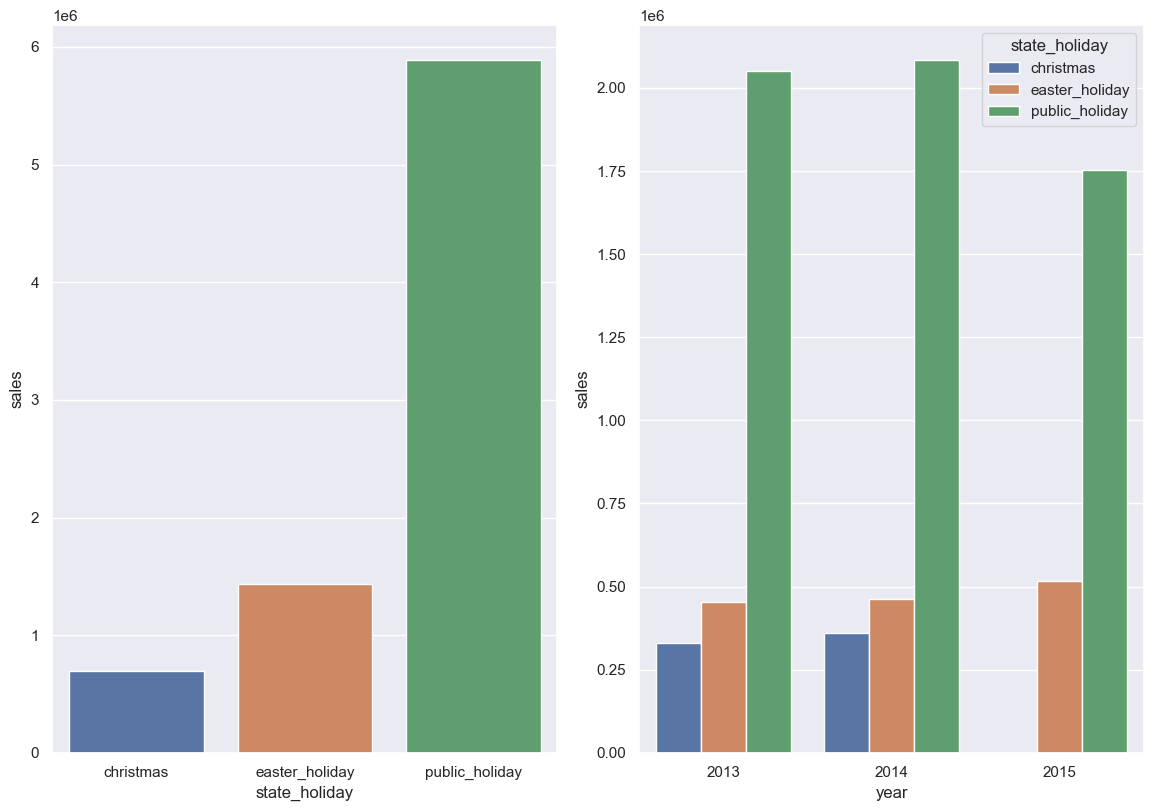

In [77]:
h7 = df4[df4['state_holiday'] != 'regular']

plt.subplot(1, 2, 1)
h7_1 = h7[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(data = h7_1, x='state_holiday', y='sales')
plt.tight_layout()

plt.subplot(1, 2, 2)
h7_2 = h7[['state_holiday', 'sales', 'year']].groupby(['state_holiday', 'year']).sum().reset_index()
sns.barplot(data = h7_2, x='year', y='sales', hue='state_holiday')
plt.tight_layout();

### H8. Lojas deveriam vender mais ao longo dos anos.

- ***FALSA:*** Lojas vendem menos ao longo dos anos


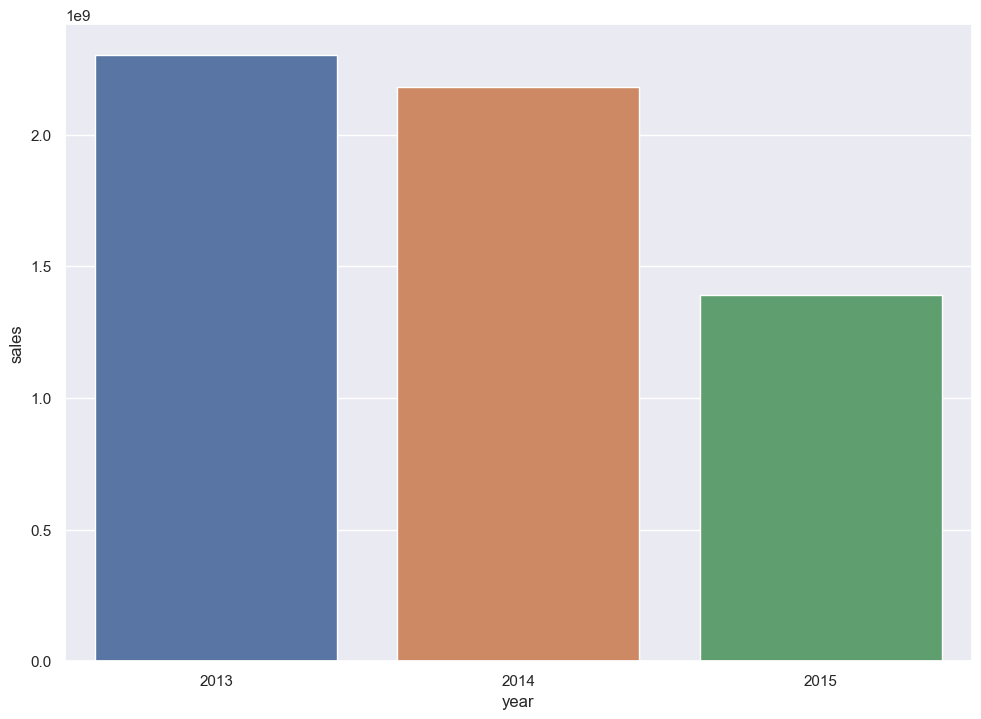

In [93]:
h8 = df4[['year', 'sales']].groupby('year').sum().reset_index()
sns.barplot(data=h8, x='year', y='sales');

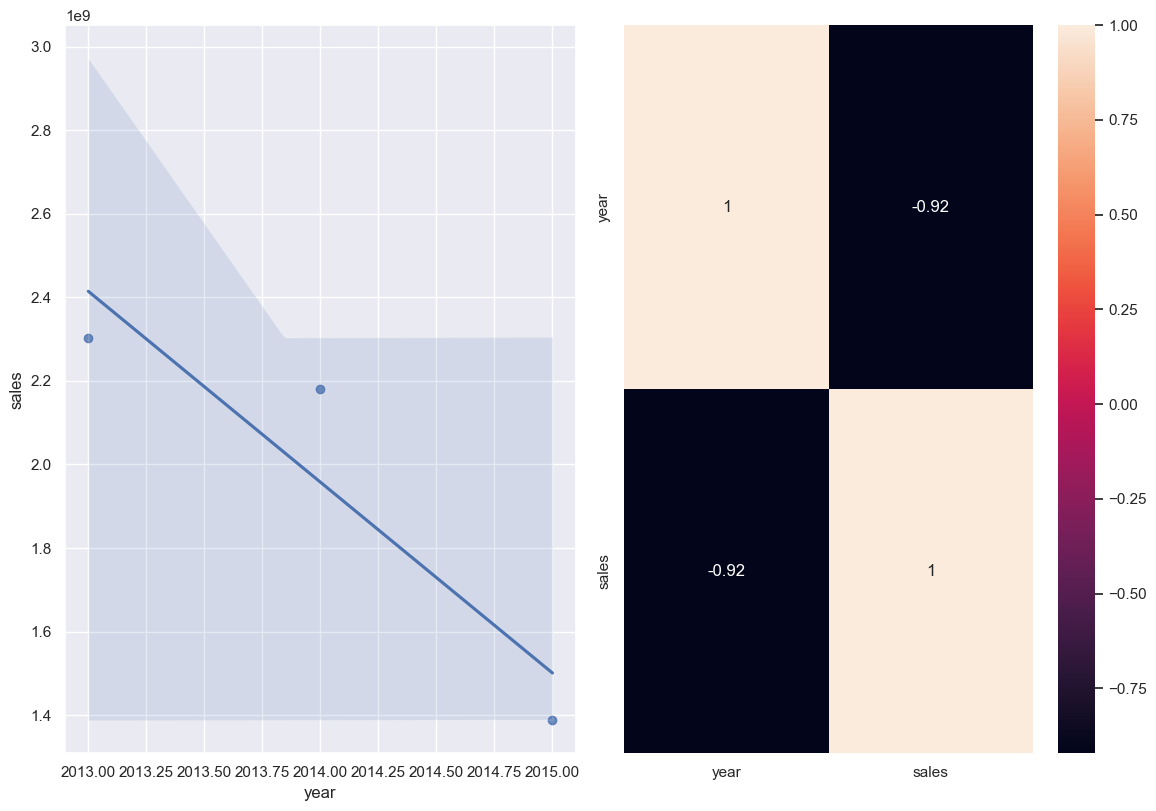

In [94]:
plt.subplot(1, 2, 1)
sns.regplot(data=h8, x='year', y='sales')
plt.tight_layout();

plt.subplot(1, 2, 2)
sns.heatmap(h8.corr(method='pearson'), annot=True)
plt.tight_layout();

### H9. Lojas deveriam vender mais no segundo semestre do ano.

- ***FALSE:*** Lojas vendem menos no segundo semestre do ano


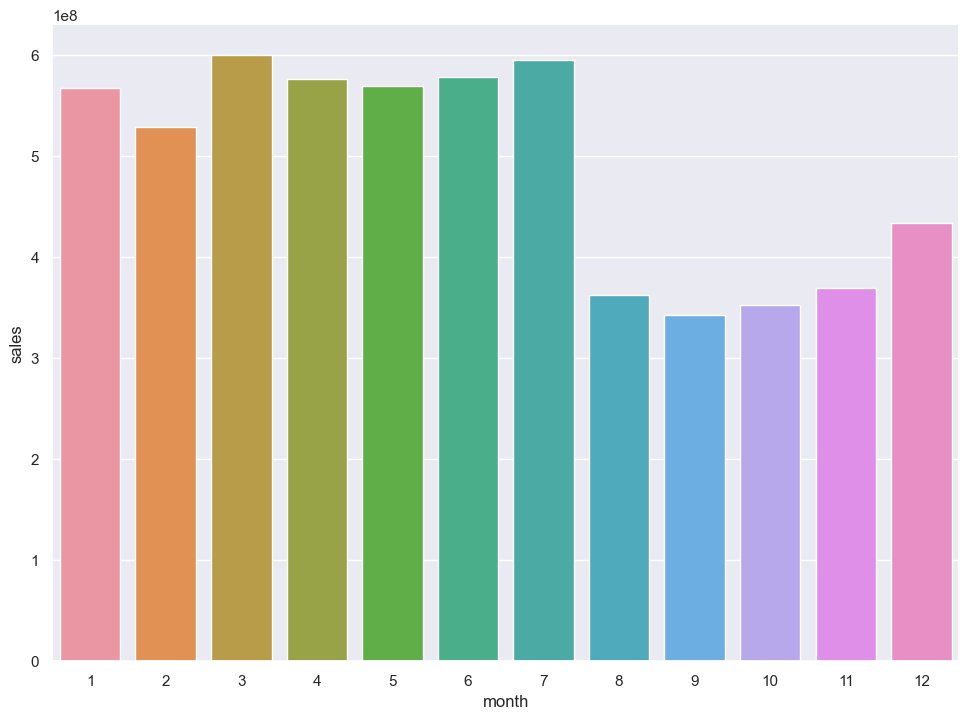

In [97]:
h9 = df4[['month', 'sales']].groupby('month').sum().reset_index()
sns.barplot(data=h9, x='month', y='sales');

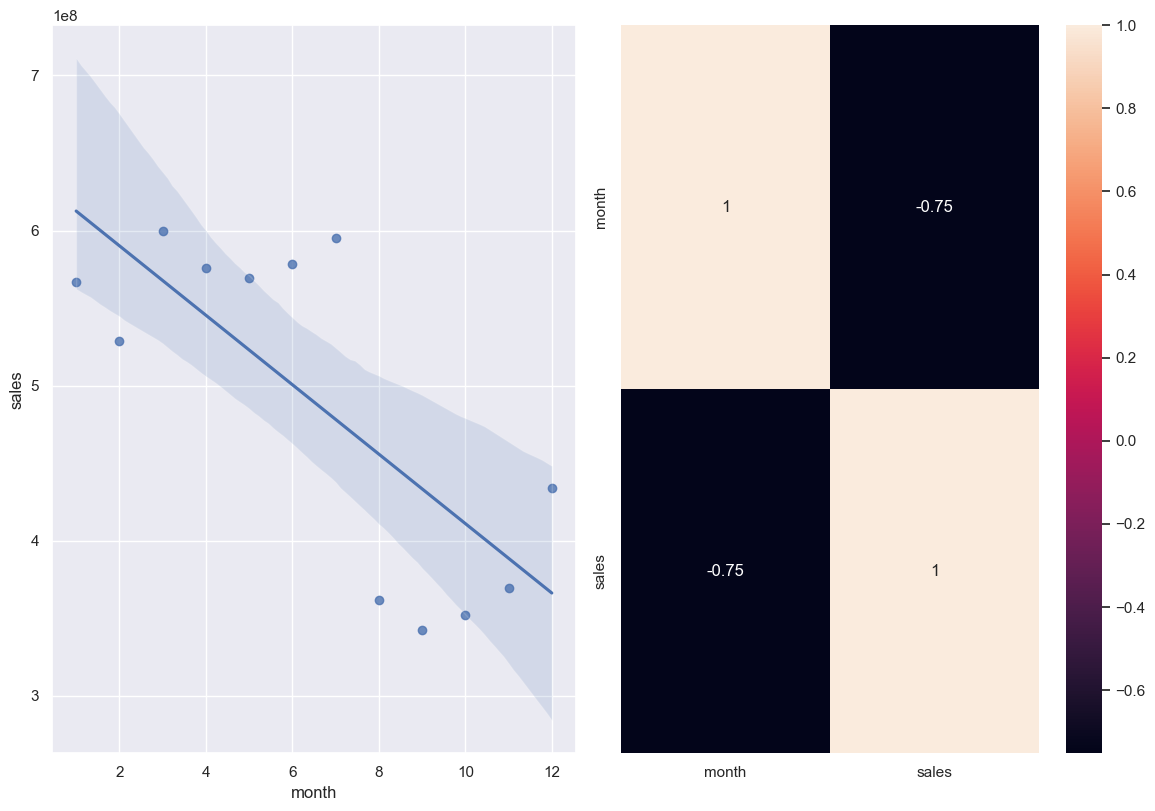

In [98]:
plt.subplot(1, 2, 1)
sns.regplot(data=h9, x='month', y='sales')
plt.tight_layout();

plt.subplot(1, 2, 2)
sns.heatmap(h9.corr(method='pearson'), annot=True)
plt.tight_layout();

### H10. Lojas deveriam vender mais depois do dia 10 de cada mês.

- ***VERDADEIRA:*** Lojas vendem mais após o dia 10 de cada mês


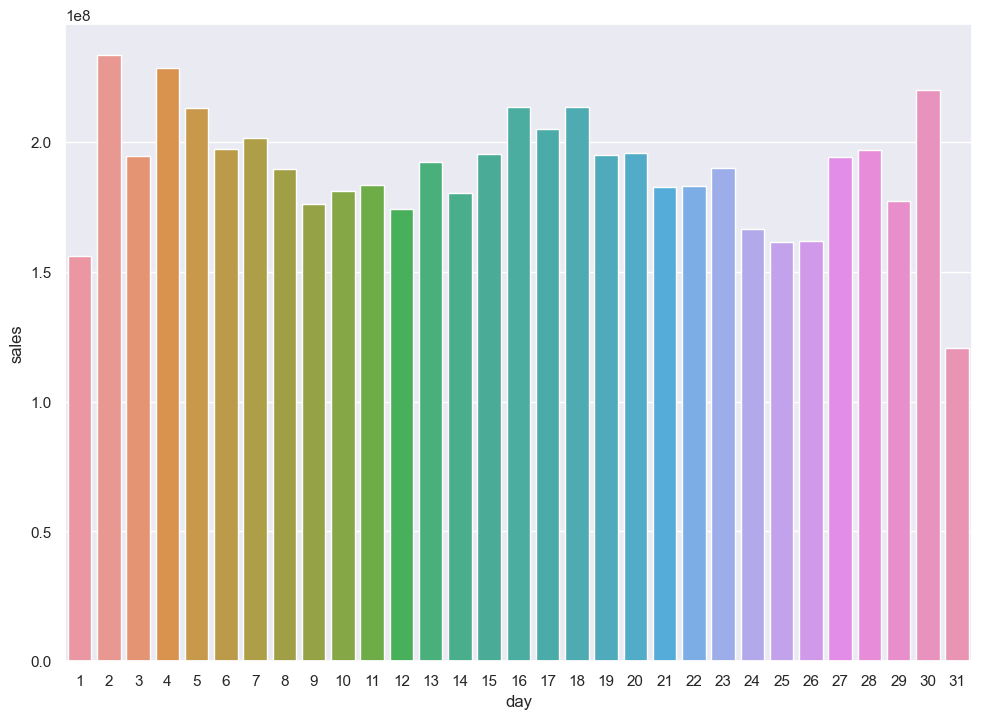

In [99]:
h10 = df4[['day', 'sales']].groupby('day').sum().reset_index()
sns.barplot(data=h10, x='day', y='sales');

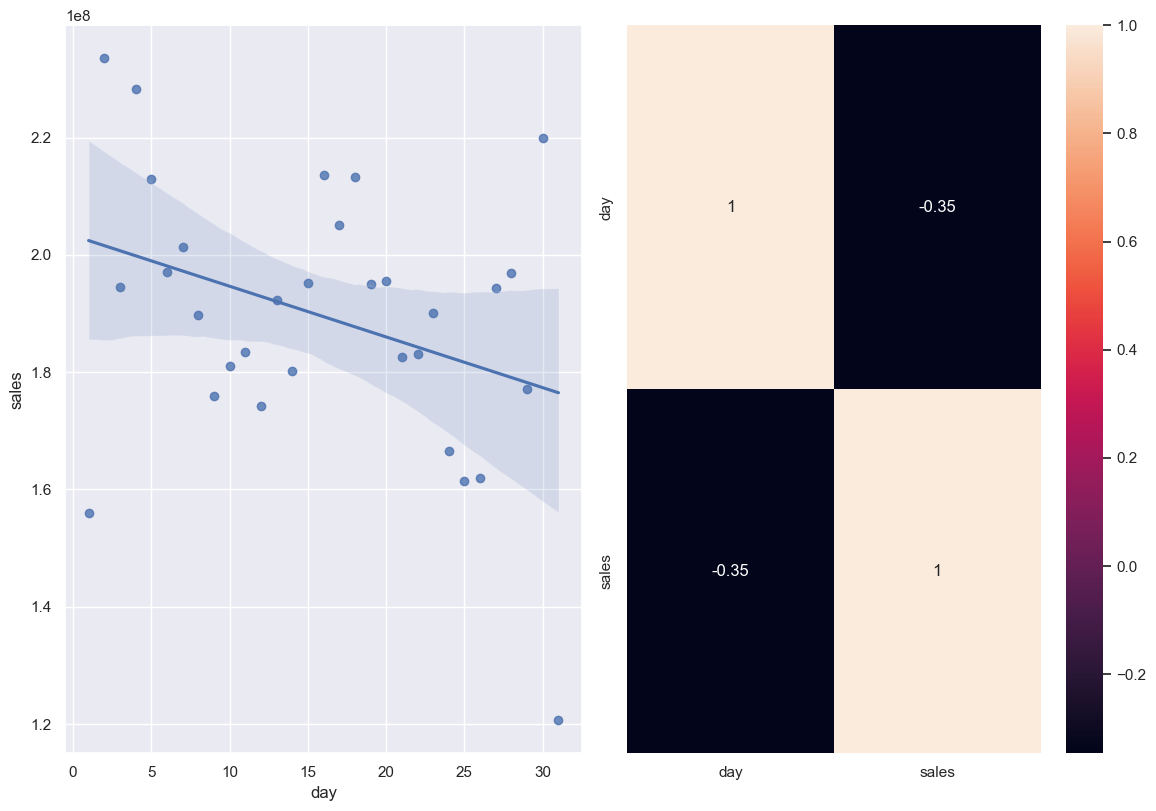

In [100]:
plt.subplot(1, 2, 1)
sns.regplot(data=h10, x='day', y='sales')
plt.tight_layout();

plt.subplot(1, 2, 2)
sns.heatmap(h10.corr(method='pearson'), annot=True)
plt.tight_layout();

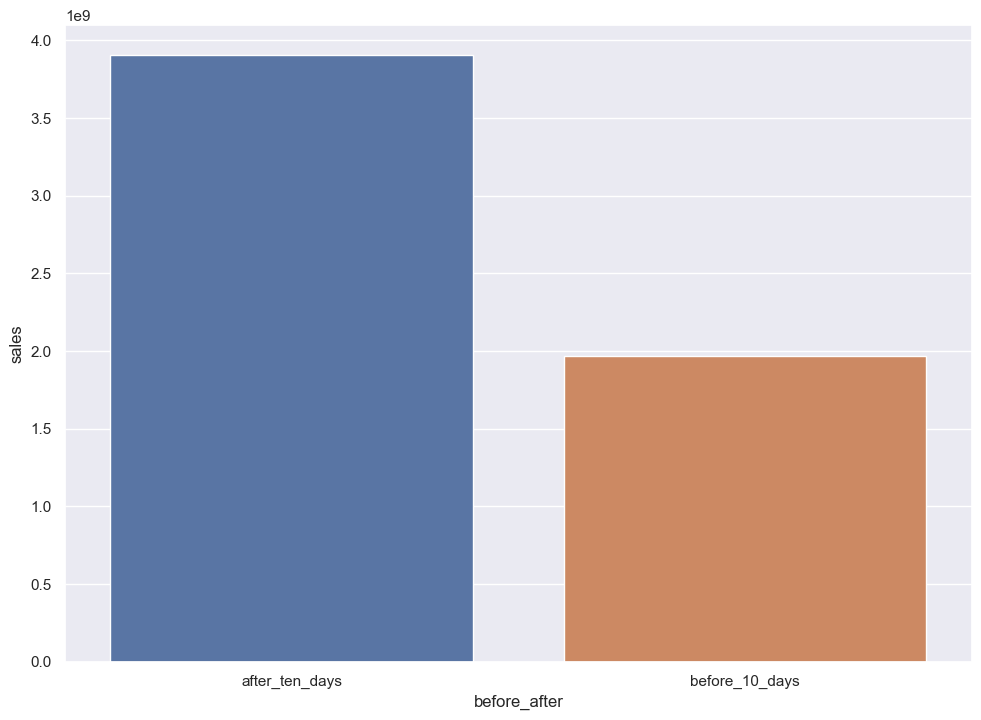

In [115]:
h10['before_after'] = h10['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')

h10_2 = h10[['before_after', 'sales']].groupby('before_after').sum().reset_index()
sns.barplot(data=h10_2, x='before_after', y='sales');

### H11. Lojas deveriam vender menos aos finais de semana

- ***FALSA:*** Lojas vendem menos aos finais de semana

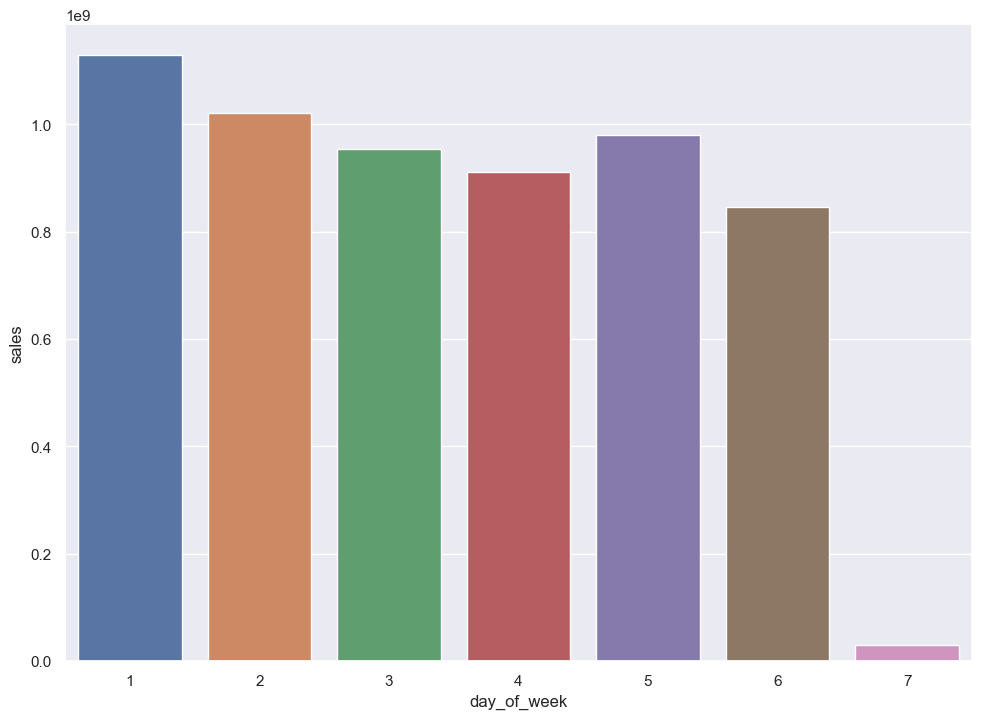

In [116]:
h11 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()
sns.barplot(data=h11, x='day_of_week', y='sales');

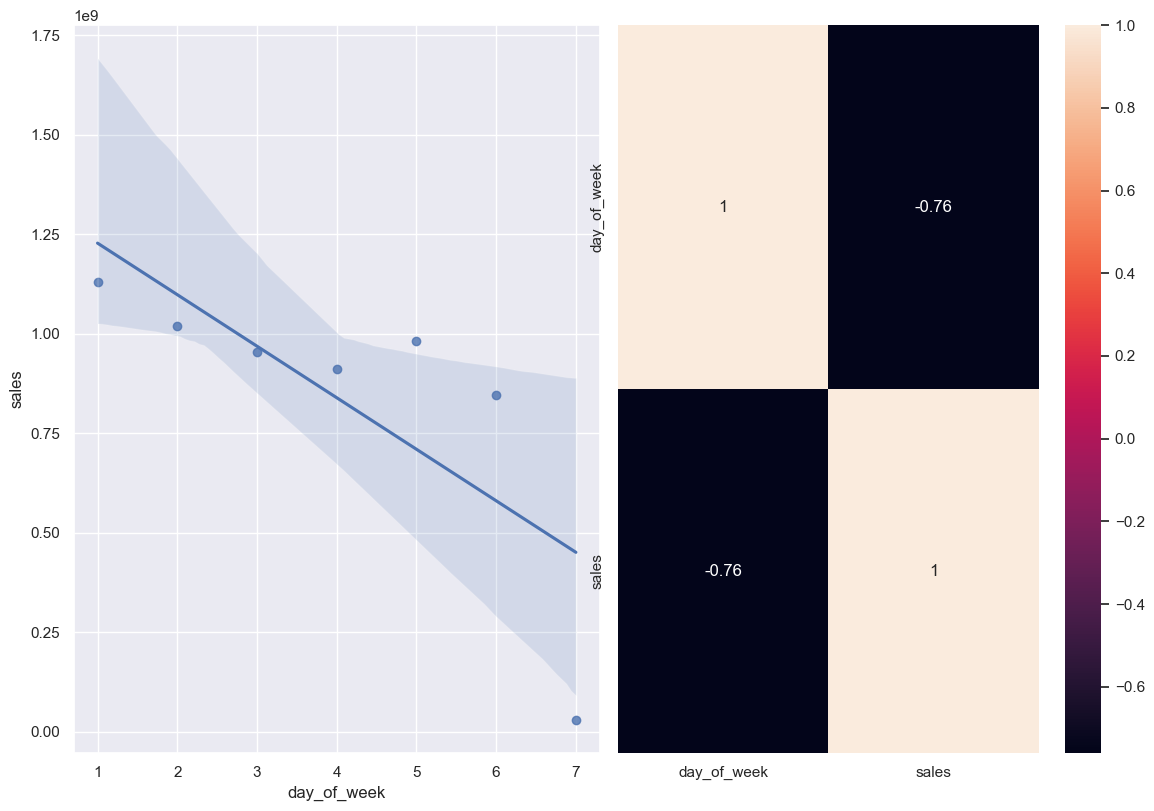

In [118]:
plt.subplot(1, 2, 1)
sns.regplot(data=h11, x='day_of_week', y='sales')
plt.tight_layout();

plt.subplot(1, 2, 2)
sns.heatmap(h11.corr(method='pearson'), annot=True);

### H12. Lojas deveriam vender menos durante os feriados escolares

- ***VERDADEIRA:*** Lojas vendem menos em feriados escolares

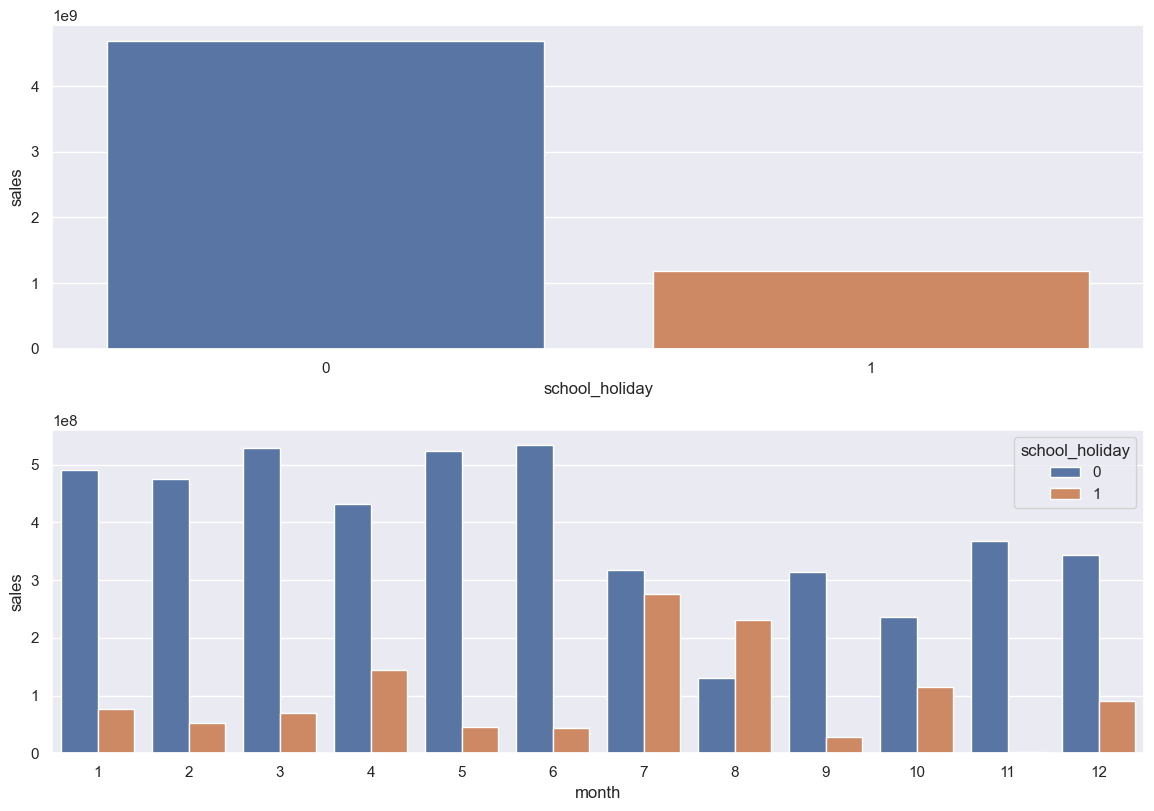

In [133]:
h12 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()

plt.subplot(2, 1, 1)
sns.barplot(data=h12, x='school_holiday', y='sales')

plt.subplot(2, 1, 2)
h12_1 = df4[['school_holiday', 'sales', 'month']].groupby(['school_holiday', 'month']).sum().reset_index()
sns.barplot(data = h12_1, x='month', y='sales', hue='school_holiday')
plt.tight_layout();

## 4.3 Análise Multivariada